In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-eda-movies/movies_complete.csv


Loading Data

In [89]:
df=pd.read_csv('/kaggle/input/imdb-eda-movies/movies_complete.csv')
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,10/30/1995,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415,7.7,21.946943,81.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,12/15/1995,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413,6.9,17.015539,104.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,12/22/1995,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92,6.5,11.712900,101.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,12/22/1995,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34,6.1,3.859495,127.0,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,2/10/1995,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173,5.7,8.387519,106.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaN,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1,4.0,0.072051,90.0,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,11/17/2011,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3,9.0,0.178241,360.0,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,8/1/2003,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6,3.8,0.903007,90.0,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,10/21/1917,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0,NaN,0.003503,87.0,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


# **Getting Info About Data**

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  int64  
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ca

Renaming Columns

In [91]:
df=df.rename(columns={'budget_musd':'budget','revenue_musd':'revenue','vote_average':'rating'})

In [92]:
# #filling na values of budget and revenue with there mean
b=df['budget'].mean()
r=df['revenue'].mean()
df=df.fillna({'budget':b,'revenue':r})
# np.round(df['budget'],1)
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget,revenue,production_companies,production_countries,vote_count,rating,popularity,runtime,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,10/30/1995,Animation|Comedy|Family,Toy Story Collection,en,30.000000,373.554033,Pixar Animation Studios,United States of America,5415,7.7,21.946943,81.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,12/15/1995,Adventure|Fantasy|Family,NaN,en,65.000000,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413,6.9,17.015539,104.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,12/22/1995,Romance|Comedy,Grumpy Old Men Collection,en,21.669886,68.968649,Warner Bros.|Lancaster Gate,United States of America,92,6.5,11.712900,101.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,12/22/1995,Comedy|Drama|Romance,NaN,en,16.000000,81.452156,Twentieth Century Fox Film Corporation,United States of America,34,6.1,3.859495,127.0,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,2/10/1995,Comedy,Father of the Bride Collection,en,21.669886,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173,5.7,8.387519,106.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [93]:
df=df.drop(columns=['original_language'])
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,budget,revenue,production_companies,production_countries,vote_count,rating,popularity,runtime,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,10/30/1995,Animation|Comedy|Family,Toy Story Collection,30.000000,373.554033,Pixar Animation Studios,United States of America,5415,7.7,21.946943,81.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,12/15/1995,Adventure|Fantasy|Family,NaN,65.000000,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413,6.9,17.015539,104.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,12/22/1995,Romance|Comedy,Grumpy Old Men Collection,21.669886,68.968649,Warner Bros.|Lancaster Gate,United States of America,92,6.5,11.712900,101.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,12/22/1995,Comedy|Drama|Romance,NaN,16.000000,81.452156,Twentieth Century Fox Film Corporation,United States of America,34,6.1,3.859495,127.0,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,2/10/1995,Comedy,Father of the Bride Collection,21.669886,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173,5.7,8.387519,106.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


# # The best and the worst movies
* Highest Revenue
* Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
* Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
* Highest number of Votes
* Highest Rating (only movies with 10 or more Ratings)
* Lowest Rating (only movies with 10 or more Ratings)
* Highest Popularity 

**Creating Columns Profit and Roi**

In [94]:
df['profit']=df['revenue']-df['budget']
df['roi']=df['revenue']/df['budget']
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,budget,revenue,production_companies,production_countries,vote_count,rating,popularity,runtime,cast,cast_size,crew_size,director,profit,roi
0,862,Toy Story,NaN,10/30/1995,Animation|Comedy|Family,Toy Story Collection,30.000000,373.554033,Pixar Animation Studios,United States of America,5415,7.7,21.946943,81.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,343.554033,12.451801
1,8844,Jumanji,Roll the dice and unleash the excitement!,12/15/1995,Adventure|Fantasy|Family,NaN,65.000000,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413,6.9,17.015539,104.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,197.797249,4.043035
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,12/22/1995,Romance|Comedy,Grumpy Old Men Collection,21.669886,68.968649,Warner Bros.|Lancaster Gate,United States of America,92,6.5,11.712900,101.0,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,47.298763,3.182696
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,12/22/1995,Comedy|Drama|Romance,NaN,16.000000,81.452156,Twentieth Century Fox Film Corporation,United States of America,34,6.1,3.859495,127.0,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,65.452156,5.090760
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,2/10/1995,Comedy,Father of the Bride Collection,21.669886,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173,5.7,8.387519,106.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,54.909025,3.533886


**Top Movies with Highest Revenue**

In [115]:
df=df.sort_values(by=['revenue','roi'],ascending=False)
h_revenue=df[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_revenue.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
14448,19995,Avatar,237.0,2787.965087,12114,7.2,185.070892,2550.965087,11.763566
26265,140607,Star Wars: The Force Awakens,245.0,2068.223624,7993,7.5,31.626013,1823.223624,8.441729
1620,597,Titanic,200.0,1845.034188,7770,7.5,26.889070,1645.034188,9.225171
17669,24428,The Avengers,220.0,1519.557910,12000,7.4,89.887648,1299.557910,6.907081
24812,135397,Jurassic World,150.0,1513.528810,8842,6.5,32.790475,1363.528810,10.090192
28501,168259,Furious 7,190.0,1506.249360,4253,7.3,27.275687,1316.249360,7.927628
26268,99861,Avengers: Age of Ultron,280.0,1405.403694,6908,7.3,37.379420,1125.403694,5.019299
17294,12445,Harry Potter and the Deathly Hallows: Part 2,125.0,1342.000000,6141,7.9,24.990737,1217.000000,10.736000
21876,109445,Frozen,150.0,1274.219009,5440,7.3,24.248243,1124.219009,8.494793
41556,321612,Beauty and the Beast,160.0,1262.886337,5530,6.8,287.253654,1102.886337,7.893040


**Top Movies with Highest Budget**

In [96]:
df=df.sort_values(by='budget',ascending=False)
h_budget=df[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_budget.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
16986,1865,Pirates of the Caribbean: On Stranger Tides,380.0,1045.713802,5068,6.4,27.887720,665.713802,2.751878
11743,285,Pirates of the Caribbean: At World's End,300.0,961.000000,4627,6.9,31.363664,661.000000,3.203333
26268,99861,Avengers: Age of Ultron,280.0,1405.403694,6908,7.3,37.379420,1125.403694,5.019299
10985,1452,Superman Returns,270.0,391.081192,1429,5.4,13.284712,121.081192,1.448449
18517,49529,John Carter,260.0,284.139100,2170,6.1,14.670353,24.139100,1.092843
16006,38757,Tangled,260.0,591.794936,3419,7.4,14.684761,331.794936,2.276134
44095,335988,Transformers: The Last Knight,260.0,604.942143,1440,6.2,39.186819,344.942143,2.326701
11696,559,Spider-Man 3,258.0,890.871626,3687,5.9,27.614265,632.871626,3.452991
20959,57201,The Lone Ranger,255.0,89.289910,2361,5.9,12.729104,-165.710090,0.350157
21825,57158,The Hobbit: The Desolation of Smaug,250.0,958.400000,4633,7.6,20.644776,708.400000,3.833600


**Highest Return on Investment(only movies with Budget >= 10)**

In [97]:
# Filtering Budget
rdf=df.loc[df['budget']>10]
h_roi=rdf.sort_values(by='roi',ascending=False)
h_roi=h_roi[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_roi.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
1055,601,E.T. the Extra-Terrestrial,10.5,792.965326,3359,7.3,19.358546,782.465326,75.520507
255,11,Star Wars,11.0,775.398007,6778,8.1,42.149697,764.398007,70.490728
588,114,Pretty Woman,14.0,463.000000,1807,7.0,13.348451,449.000000,33.071429
18300,77338,The Intouchables,13.0,426.480871,5410,8.2,16.086919,413.480871,32.806221
1144,1891,The Empire Strikes Back,18.0,538.400000,5998,8.2,19.470959,520.400000,29.911111
41167,360814,Dangal,10.4,310.000000,140,8.0,8.792104,299.600000,29.807692
16005,45269,The King's Speech,15.0,414.211549,2817,7.6,11.260387,399.211549,27.614103
577,771,Home Alone,18.0,476.684675,2487,7.1,0.702543,458.684675,26.482482
23259,222935,The Fault in Our Stars,12.0,307.166834,3868,7.6,16.274653,295.166834,25.597236
15943,44214,Black Swan,13.0,327.803731,4562,7.3,12.989056,314.803731,25.215672


**Lowest Return on Investment(only movies with Budget >= 10)**

In [98]:
l_roi=rdf.sort_values(by='roi',ascending=True)
l_roi=l_roi[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
l_roi.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
37572,114394,The Lonely Lady,21.669886,0.000001,2,4.0,0.495813,-21.669885,4.614699e-08
25706,25373,A Cry in the Wild,21.669886,0.000001,6,6.7,0.802270,-21.669885,4.614699e-08
2329,274253,Belizaire the Cajun,21.669886,0.000001,1,5.0,0.063442,-21.669885,4.614699e-08
114,51352,Anne Frank Remembered,21.669886,0.000001,4,7.3,0.243986,-21.669885,4.614699e-08
1556,45019,Washington Square,21.669886,0.000001,5,7.4,1.301573,-21.669885,4.614699e-08
2469,25471,The King of Masks,21.669886,0.000001,12,7.8,2.291724,-21.669885,4.614699e-08
4647,45864,Extreme Days,21.669886,0.000001,5,5.9,0.266895,-21.669885,4.614699e-08
41970,52623,Missing,21.669886,0.000001,2,4.3,0.229233,-21.669885,4.614699e-08
35942,118408,The Life of Guskou Budori,21.669886,0.000002,2,6.5,0.394173,-21.669884,9.229398e-08
30649,13748,A Ticket to Space,21.669886,0.000002,30,5.4,3.668405,-21.669884,9.229398e-08


**Highest number of Votes**

In [99]:
h_votes=df.sort_values(by='vote_count',ascending=False)
h_votes=h_votes[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_votes.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
15368,27205,Inception,160.0,825.532764,14075,8.1,29.108149,665.532764,5.159580
12396,155,The Dark Knight,185.0,1004.558444,12269,8.3,123.167259,819.558444,5.430046
14448,19995,Avatar,237.0,2787.965087,12114,7.2,185.070892,2550.965087,11.763566
17669,24428,The Avengers,220.0,1519.557910,12000,7.4,89.887648,1299.557910,6.907081
26272,293660,Deadpool,58.0,783.112979,11444,7.4,187.860492,725.112979,13.501948
22635,157336,Interstellar,165.0,675.120017,11187,8.1,32.213481,510.120017,4.091636
19857,68718,Django Unchained,100.0,425.368238,10297,7.8,19.785025,325.368238,4.253682
23495,118340,Guardians of the Galaxy,170.0,773.328629,10014,7.9,53.291601,603.328629,4.548992
2816,550,Fight Club,63.0,100.853753,9678,8.3,63.869599,37.853753,1.600853
18082,70160,The Hunger Games,75.0,691.210692,9634,6.9,20.031667,616.210692,9.216143


**Highest Rating (only movies with 10 or more Ratings)**

In [100]:
ratings=df.loc[df['rating']>=10]
h_ratings=ratings.sort_values(by='rating',ascending=False)
h_ratings=h_ratings[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_ratings.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
2626,89861,Stiff Upper Lips,21.669886,68.968649,1,10.0,0.882132,47.298763,3.182696
42939,452166,The Reagan Show,21.669886,68.968649,1,10.0,0.206170,47.298763,3.182696
36118,243416,Acéphale,21.669886,68.968649,1,10.0,0.052426,47.298763,3.182696
35505,211139,The Lion of Thebes,21.669886,68.968649,1,10.0,1.783625,47.298763,3.182696
34984,43823,Tom Brown's School Days,21.669886,68.968649,1,10.0,0.039299,47.298763,3.182696
35810,361183,Sum of Histories,21.669886,68.968649,1,10.0,0.404432,47.298763,3.182696
35896,151062,Mad at the Moon,21.669886,68.968649,1,10.0,1.225055,47.298763,3.182696
41953,415735,Sebastian Maniscalco: Why Would You Do That?,21.669886,68.968649,2,10.0,0.167998,47.298763,3.182696
41939,390991,Frankie Boyle: Hurt Like You've Never Been Loved,21.669886,68.968649,3,10.0,0.255416,47.298763,3.182696
41937,390837,Stephen Lynch: Hello Kalamazoo,21.669886,68.968649,1,10.0,0.724499,47.298763,3.182696


**Highest Popularity**

In [101]:
h_popularity=df.sort_values(by='popularity',ascending=False)
h_popularity=h_popularity[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_popularity.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
30330,211672,Minions,74.0,1156.730962,4729,6.4,547.488298,1082.730962,15.631499
32927,297762,Wonder Woman,149.0,820.580447,5025,7.2,294.337037,671.580447,5.507251
41556,321612,Beauty and the Beast,160.0,1262.886337,5530,6.8,287.253654,1102.886337,7.893040
42940,339403,Baby Driver,34.0,224.511319,2083,7.2,228.032744,190.511319,6.603274
24187,177572,Big Hero 6,165.0,652.105443,6289,7.8,213.849907,487.105443,3.952154
26272,293660,Deadpool,58.0,783.112979,11444,7.4,187.860492,725.112979,13.501948
26273,283995,Guardians of the Galaxy Vol. 2,200.0,863.416141,4858,7.6,185.330992,663.416141,4.317081
14448,19995,Avatar,237.0,2787.965087,12114,7.2,185.070892,2550.965087,11.763566
24085,245891,John Wick,20.0,88.761661,5499,7.0,183.870374,68.761661,4.438083
23419,210577,Gone Girl,61.0,369.330363,6023,7.9,154.801009,308.330363,6.054596


**Highest Profit**

In [102]:
h_profit=df.sort_values(by='profit',ascending=False)
h_profit=h_profit[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi']]
h_profit.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
14448,19995,Avatar,237.0,2787.965087,12114,7.2,185.070892,2550.965087,11.763566
26265,140607,Star Wars: The Force Awakens,245.0,2068.223624,7993,7.5,31.626013,1823.223624,8.441729
1620,597,Titanic,200.0,1845.034188,7770,7.5,26.889070,1645.034188,9.225171
24812,135397,Jurassic World,150.0,1513.528810,8842,6.5,32.790475,1363.528810,10.090192
28501,168259,Furious 7,190.0,1506.249360,4253,7.3,27.275687,1316.249360,7.927628
17669,24428,The Avengers,220.0,1519.557910,12000,7.4,89.887648,1299.557910,6.907081
17294,12445,Harry Potter and the Deathly Hallows: Part 2,125.0,1342.000000,6141,7.9,24.990737,1217.000000,10.736000
26268,99861,Avengers: Age of Ultron,280.0,1405.403694,6908,7.3,37.379420,1125.403694,5.019299
21876,109445,Frozen,150.0,1274.219009,5440,7.3,24.248243,1124.219009,8.494793
41556,321612,Beauty and the Beast,160.0,1262.886337,5530,6.8,287.253654,1102.886337,7.893040


# Most Successful Movies on basis of Highest of Everything

In [103]:
ndf=pd.concat([h_revenue,h_budget,h_roi,h_votes,h_ratings,h_popularity,h_profit])
ndf.head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
14448,19995,Avatar,237.0,2787.965087,12114,7.2,185.070892,2550.965087,11.763566
26265,140607,Star Wars: The Force Awakens,245.0,2068.223624,7993,7.5,31.626013,1823.223624,8.441729
1620,597,Titanic,200.0,1845.034188,7770,7.5,26.889070,1645.034188,9.225171
17669,24428,The Avengers,220.0,1519.557910,12000,7.4,89.887648,1299.557910,6.907081
24812,135397,Jurassic World,150.0,1513.528810,8842,6.5,32.790475,1363.528810,10.090192
28501,168259,Furious 7,190.0,1506.249360,4253,7.3,27.275687,1316.249360,7.927628
26268,99861,Avengers: Age of Ultron,280.0,1405.403694,6908,7.3,37.379420,1125.403694,5.019299
17294,12445,Harry Potter and the Deathly Hallows: Part 2,125.0,1342.000000,6141,7.9,24.990737,1217.000000,10.736000
21876,109445,Frozen,150.0,1274.219009,5440,7.3,24.248243,1124.219009,8.494793
41556,321612,Beauty and the Beast,160.0,1262.886337,5530,6.8,287.253654,1102.886337,7.893040


**Best Movies Having Duplicated ids**

In [116]:
ndf.loc[ndf.duplicated()].head(10)

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi
16986,1865,Pirates of the Caribbean: On Stranger Tides,380.0,1045.713802,5068,6.4,27.887720,665.713802,2.751878
11743,285,Pirates of the Caribbean: At World's End,300.0,961.000000,4627,6.9,31.363664,661.000000,3.203333
26268,99861,Avengers: Age of Ultron,280.0,1405.403694,6908,7.3,37.379420,1125.403694,5.019299
10985,1452,Superman Returns,270.0,391.081192,1429,5.4,13.284712,121.081192,1.448449
18517,49529,John Carter,260.0,284.139100,2170,6.1,14.670353,24.139100,1.092843
16006,38757,Tangled,260.0,591.794936,3419,7.4,14.684761,331.794936,2.276134
44095,335988,Transformers: The Last Knight,260.0,604.942143,1440,6.2,39.186819,344.942143,2.326701
11696,559,Spider-Man 3,258.0,890.871626,3687,5.9,27.614265,632.871626,3.452991
20959,57201,The Lone Ranger,255.0,89.289910,2361,5.9,12.729104,-165.710090,0.350157
21825,57158,The Hobbit: The Desolation of Smaug,250.0,958.400000,4633,7.6,20.644776,708.400000,3.833600


> # **Find Your Next Movie**
Action Crime movies with Robert De Niro 

In [105]:
df.loc[(df['genres'].str.contains('Action'))&(df['genres'].str.contains('Crime'))&(df['cast'].str.contains('Robert De Niro'))]

,id,title,tagline,release_date,genres,belongs_to_collection,budget,revenue,production_companies,production_countries,vote_count,rating,popularity,runtime,cast,cast_size,crew_size,director,profit,roi
2962,2924,Backdraft,"Silently behind a door, it waits.",5/24/1991,Action|Crime|Drama|Mystery|Thriller,NaN,75.0,152.368585,Universal Pictures|Trilogy Entertainment Group...,United States of America,360,6.4,9.883727,137.0,Kurt Russell|William Baldwin|Robert De Niro|Do...,18,93,Ron Howard,77.368585,2.031581
4280,11371,The Score,There are no partners in crime,7/13/2001,Action|Crime|Thriller,NaN,68.0,71.069884,Paramount Pictures|Mandalay Pictures|Horseshoe...,Germany|United States of America,436,6.7,14.741992,124.0,Robert De Niro|Edward Norton|Marlon Brando|Ang...,24,13,Frank Oz,3.069884,1.045145
4006,2749,15 Minutes,America Likes to Watch,3/1/2001,Action|Crime|Thriller,NaN,60.0,56.359980,New Line Cinema|Industry Entertainment|Tribeca...,Germany|United States of America,194,5.7,12.149946,120.0,Robert De Niro|Charlize Theron|Edward Burns|Ke...,86,338,John Herzfeld,-3.640020,0.939333
12857,13389,Righteous Kill,Most people respect the badge. Everybody respe...,9/11/2008,Action|Crime|Drama|Thriller,NaN,60.0,73.174566,Grosvenor Park Media Ltd.|InVenture Entertainm...,United States of America,382,5.9,7.094624,101.0,Robert De Niro|Carla Gugino|50 Cent|Al Pacino|...,33,2,Jon Avnet,13.174566,1.219576
5,949,Heat,A Los Angeles Crime Saga,12/15/1995,Action|Crime|Drama|Thriller,NaN,60.0,187.436818,Regency Enterprises|Forward Pass|Warner Bros.,United States of America,1886,7.7,17.924927,170.0,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,65,71,Michael Mann,127.436818,3.123947
2142,8195,Ronin,Your ally could become your enemy.,9/25/1998,Action|Thriller|Crime|Adventure,NaN,55.0,41.610884,United Artists|FGM Entertainment,France|United Kingdom|United States of America,670,6.8,9.672094,122.0,Robert De Niro|Jean Reno|Natascha McElhone|Ste...,33,75,John Frankenheimer,-13.389116,0.756562
21390,112205,The Family,Some call it organized crime. Others call it f...,9/13/2013,Crime|Comedy|Action,NaN,30.0,36.894225,Canal Plus|TF1 Films Production|Grive Producti...,France|United States of America,1052,6.1,8.047735,111.0,Robert De Niro|Michelle Pfeiffer|Dianna Agron|...,24,4,Luc Besson,6.894225,1.229807
1501,2142,Cop Land,No One Is Above The Law.,8/15/1997,Action|Crime|Drama,NaN,15.0,44.862187,Miramax Films|Across the River Productions|Woo...,United States of America,384,6.6,9.159310,104.0,Sylvester Stallone|Harvey Keitel|Ray Liotta|Ro...,22,20,James Mangold,29.862187,2.990812
38067,122800,Freelancers,"To serve, protect... and steal.",8/10/2012,Mystery|Drama|Action|Crime,NaN,11.0,68.968649,Grindstone Entertainment Group|Cheetah Vision|...,United States of America,68,4.7,5.973229,96.0,50 Cent|Forest Whitaker|Robert De Niro|Ryan O'...,36,87,Jessy Terrero,57.968649,6.269877
34108,336004,Heist,Never make a bet you can't afford to lose.,11/13/2015,Crime|Action|Thriller,NaN,8.9,4.100000,Emmett/Furla Films|Silver Plane Films|Mass Hys...,United States of America,322,5.6,8.476315,93.0,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,37,38,Scott Mann,-4.800000,0.460674


# Most Successful Pixar Movies from 2010 to 2015 By Revenue

Extracting Year From Release date Without using Date-Time function

In [125]:
df['year']=df['release_date'].str.split('/',expand=True)[2]
# converting year column datatype from object to int
df=df.fillna({'year':'0000'})
df['year']=df['year'].astype(int)
vdf=df.loc[(df['year']>=2010)&(df['year']<=2015)&(df['production_companies'].str.contains('Pixar'))]
vdf=vdf.sort_values(by='revenue',ascending=False)
vdf=vdf[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi','year']]
vdf=vdf.iloc[0:7,:]
vdf

,id,title,budget,revenue,vote_count,rating,popularity,profit,roi,year
15236,10193,Toy Story 3,200.000000,1066.969703,4710,7.6,16.966470,866.969703,5.334849,2010
29957,150540,Inside Out,175.000000,857.611174,6737,7.9,23.985587,682.611174,4.900635,2015
20888,62211,Monsters University,200.000000,743.559607,3622,7.0,16.267502,543.559607,3.717798,2013
17220,49013,Cars 2,200.000000,559.852396,2088,5.8,13.693002,359.852396,2.799262,2011
18900,62177,Brave,185.000000,538.983207,4760,6.7,15.876341,353.983207,2.913423,2012
30388,105864,The Good Dinosaur,175.000000,331.926147,1782,6.6,12.319595,156.926147,1.896721,2015
40675,355338,Riley's First Date?,21.669886,68.968649,188,7.2,6.051285,47.298763,3.182696,2015


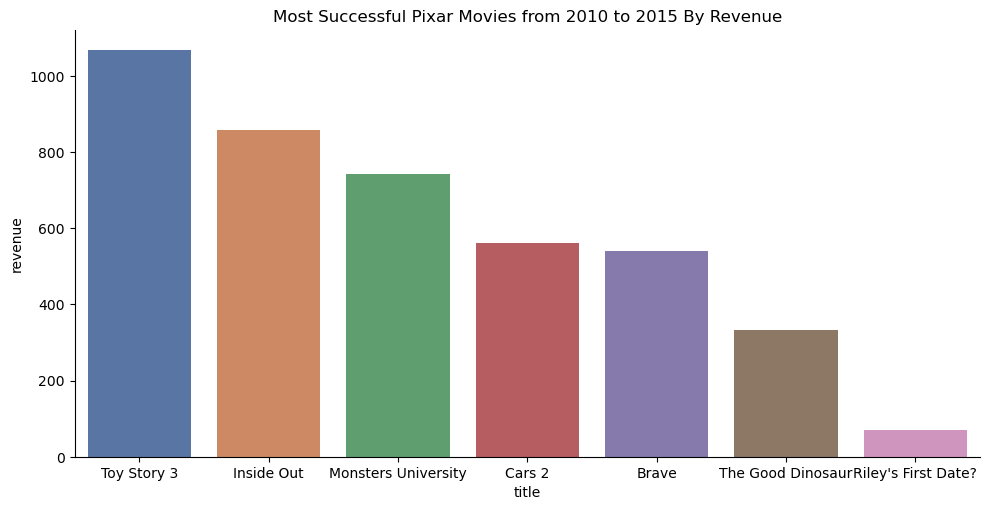

In [150]:
sns.catplot(data=vdf,x='title',y='revenue',kind='bar',aspect=2,palette='deep')
plt.title("Most Successful Pixar Movies from 2010 to 2015 By Revenue")
plt.show()

**Total Number of Movies each year by Pixar**

In [107]:
vdf['year'].value_counts() 
# similar to vdf.groupby('year')['year'].count()

2015    5
2011    5
2013    3
2012    3
2010    2
2014    1
Name: year, dtype: int64

# **Frequency Of Words in title**

In [108]:
titles=list(df['title'])
titles=''.join(titles)
titles=titles.lower()

In [109]:
# keeping only alphabets and spaces
s=''
for ch in titles:
    if (ch.isalpha() or ch==' '):
        s=s+ch
s=s.split(' ') #list of all words present
s=pd.Series(s)
s=pd.DataFrame(s.value_counts())
# top 50
s.head(50)

,0
the,5976
of,4840
and,1576
in,1465
,1316
a,1296
to,965
for,531
on,507
from,335


# Are Franchises More Successful ?

In [154]:
# First We will make a column named type
df['type']='franchises'
df.loc[df['belongs_to_collection'].isnull(),'type']='standalone'
# edf[['id','title','budget','revenue','vote_count','rating','popularity','profit','roi','year','type']]

# df.value_counts('type')
frdf=df.groupby('type').agg({'title':'count','budget':['sum','mean'],'profit':'mean','roi':'mean','revenue':'mean','vote_count':'mean','rating':'mean','popularity':'mean'})
frdf

title         budget                profit           roi  \
            count            sum       mean       mean          mean   
type                                                                   
franchises   4463  123052.940160  27.571799  73.455507   2760.747855   
standalone  40228  845395.941819  21.015112  44.396865  51056.345504   

               revenue  vote_count    rating popularity  
                  mean        mean      mean       mean  
type                                                     
franchises  101.027306  412.387856  5.956806   6.245051  
standalone   65.411978   78.289550  6.008787   2.592726

**Most successful Franchises**

In [111]:
fdf=df.loc[df['type']=='franchises']
fdf=df.groupby('belongs_to_collection').agg({'title':'count','budget':['sum','mean'],'profit':'mean','roi':'mean','revenue':'mean','vote_count':'mean','rating':'mean','popularity':'mean'})
fdf

title      budget                 profit  \
                                     count         sum       mean        mean   
belongs_to_collection                                                           
... Has Fallen Collection                2  130.000000  65.000000  118.390044   
00 Schneider Filmreihe                   1   21.669886  21.669886   47.298763   
08/15 Collection                         1   21.669886  21.669886   47.298763   
100 Girls Collection                     2   43.339772  21.669886   47.298763   
101 Dalmatians (Animated) Collection     2   25.669886  12.834943  129.589389   
...                                    ...         ...        ...         ...   
Сказки Чуковского                        1   21.669886  21.669886   47.298763   
Чебурашка и крокодил Гена                1   21.669886  21.669886   47.298763   
Что Творят мужчины! (Коллекция)          2   23.669886  11.834943   57.133706   
男はつらいよ シリーズ                              3   65.009658  21.669886   47.298763   
식객 시리즈                                   2   43.339772  21.669886   47.298763   

                                            roi     revenue   vote_count  \
                                           mean        mean         mean   
belongs_to_collection                                                      
... Has Fallen Collection              2.864804  183.390043  2333.000000   
00 Schneider Filmreihe                 3.182696   68.968649    16.000000   
08/15 Collection                       3.182696   68.968649     4.000000   
100 Girls Collection                   3.182696   68.968649    64.000000   
101 Dalmatians (Animated) Collection  28.576350  142.424332   937.000000   
...                                         ...         ...          ...   
Сказки Чуковского                      3.182696   68.968649     3.000000   
Чебурашка и крокодил Гена              3.182696   68.968649     7.000000   
Что Творят мужчины! (Коллекция)       18.833510   68.968649     5.500000   
男はつらいよ シリーズ                            3.182696   68.968649     0.666667   
식객 시리즈                                 3.182696   68.968649     3.500000   

                                     rating popularity  
                                       mean       mean  
belongs_to_collection                                   
... Has Fallen Collection              6.00  13.008090  
00 Schneider Filmreihe                 6.50   1.931299  
08/15 Collection                       5.90   0.628127  
100 Girls Collection                   5.15   3.078651  
101 Dalmatians (Animated) Collection   6.25  13.063212  
...                                     ...        ...  
Сказки Чуковского                      3.00   0.731334  
Чебурашка и крокодил Гена              6.70   0.881504  
Что Творят мужчины! (Коллекция)        3.15   1.299605  
男はつらいよ シリーズ                            7.00   0.038901  
식객 시리즈                                 4.95   0.157245  

[1691 rows x 9 columns]

**Best on behalf of revenue**

In [112]:
fdf.sort_values(by=('revenue','mean'),ascending=False)

title      budget                   profit  \
                                 count         sum        mean         mean   
belongs_to_collection                                                         
Avatar Collection                    1  237.000000  237.000000  2550.965087   
The Avengers Collection              2  500.000000  250.000000  1212.480802   
Finding Nemo Collection              2  294.000000  147.000000   837.453213   
The Hobbit Collection                3  750.000000  250.000000   728.507785   
The Lord of the Rings Collection     3  266.000000   88.666667   883.514914   
...                                ...         ...         ...          ...   
V/H/S Collection                     3   65.009658   21.669886   -21.628241   
Tulse Luper                          1   10.000000   10.000000    -9.974200   
Paradise Trilogy                     3   46.939772   15.646591   -15.634099   
Elektra Luxx Collection              2   24.669886   12.334943   -12.325890   
Bats Collection                      1   21.669886   21.669886   -21.669876   

                                           roi      revenue    vote_count  \
                                          mean         mean          mean   
belongs_to_collection                                                       
Avatar Collection                 1.176357e+01  2787.965087  12114.000000   
The Avengers Collection           5.963190e+00  1462.480802   9454.000000   
Finding Nemo Collection           7.573212e+00   984.453213   5312.500000   
The Hobbit Collection             3.914031e+00   978.507785   5981.333333   
The Lord of the Rings Collection  1.099926e+01   972.181581   8253.000000   
...                                        ...          ...           ...   
V/H/S Collection                  1.921776e-03     0.041645    283.000000   
Tulse Luper                       2.580000e-03     0.025800      5.000000   
Paradise Trilogy                  2.450130e-03     0.012492     39.666667   
Elektra Luxx Collection           3.016397e-03     0.009053     39.500000   
Bats Collection                   4.614699e-07     0.000010     35.000000   

                                    rating  popularity  
                                      mean        mean  
belongs_to_collection                                   
Avatar Collection                 7.200000  185.070892  
The Avengers Collection           7.350000   63.633534  
Finding Nemo Collection           7.200000   19.987735  
The Hobbit Collection             7.233333   25.205614  
The Lord of the Rings Collection  8.033333   30.272873  
...                                    ...         ...  
V/H/S Collection                  5.433333    9.151392  
Tulse Luper                       7.800000    0.524432  
Paradise Trilogy                  6.433333    3.124625  
Elektra Luxx Collection           4.950000    5.585538  
Bats Collection                   4.100000    2.584025  

[1691 rows x 9 columns]

**Best on behalf of roi**

In [113]:
fdf.sort_values(by=('roi','mean'),ascending=False)

title      budget                profit  \
                                   count         sum       mean       mean   
belongs_to_collection                                                        
Billy Jack Collection                  4   43.699779  10.924945  49.801542   
The Karate Kid Collection              4   41.669999  10.417500  54.758202   
The August Underground Collection      1    0.000300   0.000300  68.968349   
Tarzan (Johnny Weissmuller series)     8  151.689298  18.961162  50.007487   
The Lost Skeleton Collection           2   21.670486  10.835243  58.133406   
...                                  ...         ...        ...        ...   
Elektra Luxx Collection                2   24.669886  12.334943 -12.325890   
Tulse Luper                            1   10.000000  10.000000  -9.974200   
Paradise Trilogy                       3   46.939772  15.646591 -15.634099   
V/H/S Collection                       3   65.009658  21.669886 -21.628241   
Bats Collection                        1   21.669886  21.669886 -21.669876   

                                             roi    revenue  vote_count  \
                                            mean       mean        mean   
belongs_to_collection                                                     
Billy Jack Collection               2.463193e+06  60.726487   10.500000   
The Karate Kid Collection           2.546584e+05  65.175702  470.750000   
The August Underground Collection   2.298955e+05  68.968649   21.000000   
Tarzan (Johnny Weissmuller series)  9.075101e+04  68.968649   20.625000   
The Lost Skeleton Collection        5.747547e+04  68.968649   19.500000   
...                                          ...        ...         ...   
Elektra Luxx Collection             3.016397e-03   0.009053   39.500000   
Tulse Luper                         2.580000e-03   0.025800    5.000000   
Paradise Trilogy                    2.450130e-03   0.012492   39.666667   
V/H/S Collection                    1.921776e-03   0.041645  283.000000   
Bats Collection                     4.614699e-07   0.000010   35.000000   

                                      rating popularity  
                                        mean       mean  
belongs_to_collection                                    
Billy Jack Collection               6.250000   0.973566  
The Karate Kid Collection           5.775000   8.321918  
The August Underground Collection   3.500000   1.340559  
Tarzan (Johnny Weissmuller series)  5.825000   3.864299  
The Lost Skeleton Collection        6.750000   1.346167  
...                                      ...        ...  
Elektra Luxx Collection             4.950000   5.585538  
Tulse Luper                         7.800000   0.524432  
Paradise Trilogy                    6.433333   3.124625  
V/H/S Collection                    5.433333   9.151392  
Bats Collection                     4.100000   2.584025  

[1691 rows x 9 columns]